In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [5]:
df= sns.load_dataset("titanic")

In [7]:
df.shape

(891, 15)

In [10]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [12]:
df.head(15)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


<AxesSubplot:>

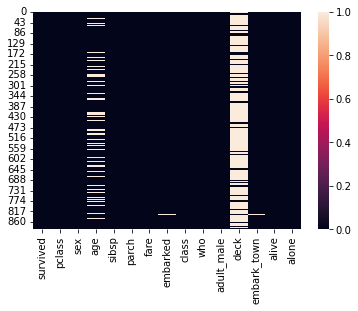

In [15]:
sns.heatmap(df.isnull())

In [17]:
import matplotlib.pyplot as plt

In [44]:
df1 = df.drop(['deck'],axis=1)

In [45]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


<AxesSubplot:>

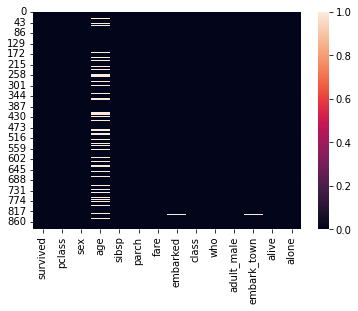

In [49]:
sns.heatmap(df1.isnull())

C:\Users\himan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

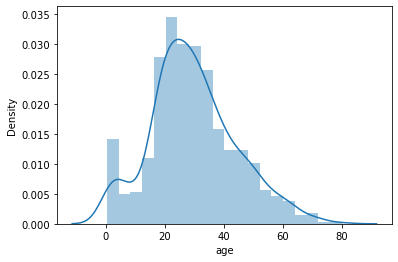

In [50]:
sns.distplot(df["age"])

In [55]:
df['age_mean']=df['age'].fillna(df['age'].mean())

In [56]:
df[['age_mean','age']]

,age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [57]:
df['median_mean'] = df['age'].fillna(df['age'].median())

In [59]:
df_median = df[['median_mean',"age"]]

In [62]:
df_median.head(20)

,median_mean,age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
5,28.0,NaN
6,54.0,54.0
7,2.0,2.0
8,27.0,27.0
9,14.0,14.0


In [ ]:
df['mode_fillna']

In [69]:
df["embarked"].isnull().sum()

2

In [70]:
df["embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [84]:
df["mode_embarked"] = df['embarked'].fillna(df['embarked'].mode()[0])

In [89]:
df[["mode_embarked",'embarked']].isnull().sum()

mode_embarked    0
embarked         2
dtype: int64

# working with imbalance dataset

In [3]:
np.random.seed(123)

n_samples = 1000

class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)

n_class_1 = n_samples-n_class_0

In [4]:
n_class_0,n_class_1

(900, 100)

In [8]:
class_0 = pd.DataFrame({
    "f_1" : np.random.normal(loc=0,scale=1,size=n_class_0),
    "f_2" : np.random.normal(loc=0,scale=1,size=n_class_0),
    "target": [0]*n_class_0

                       })

class_1 = pd.DataFrame({
    "f_1" : np.random.normal(loc=0,scale=1,size=n_class_1),
    "f_2" : np.random.normal(loc=0,scale=1,size=n_class_1),
    "target": [1]*n_class_1
                       })

In [12]:
df = pd.concat([class_0,class_1]).reset_index(drop=True)

In [13]:
df

,f_1,f_2,target
0,-0.941691,-0.460530,0
1,1.038645,-0.910269,0
2,-1.432479,-0.780990,0
3,-1.620503,-0.107118,0
4,-0.279527,-0.657885,0
...,...,...,...
995,0.080243,-0.799129,1
996,-0.542371,0.371559,1
997,1.456532,-0.456539,1
998,1.046854,-0.139554,1


In [16]:
df["target"].value_counts()

0    900
1    100
Name: target, dtype: int64

In [25]:
df_maj = df[df["target"]==0]

In [26]:
df_min = df[df["target"]==1]

In [27]:
df_maj

,f_1,f_2,target
0,-0.941691,-0.460530,0
1,1.038645,-0.910269,0
2,-1.432479,-0.780990,0
3,-1.620503,-0.107118,0
4,-0.279527,-0.657885,0
...,...,...,...
895,0.515323,0.506249,0
896,-1.465313,1.134479,0
897,0.855500,-0.653978,0
898,1.028167,0.015896,0


In [28]:
df_min

,f_1,f_2,target
900,1.131538,1.966215,1
901,-0.321510,0.938504,1
902,0.392148,0.161370,1
903,-0.541998,-1.518005,1
904,-1.513386,0.541051,1
...,...,...,...
995,0.080243,-0.799129,1
996,-0.542371,0.371559,1
997,1.456532,-0.456539,1
998,1.046854,-0.139554,1


# upsampling

In [19]:
from sklearn.utils import resample

In [20]:
df_minority_upsample= resample(df_min,replace=True,n_samples=len(df_maj),
                               random_state= 42)


NameError: name 'df_min' is not defined

In [21]:
df_minority_upsample

NameError: name 'df_minority_upsample' is not defined

In [32]:
df_upsampled = pd.concat([df_minority_upsample,df_maj])

In [33]:
df_upsampled

,f_1,f_2,target
951,2.718427,-0.358129,1
992,-1.002881,-0.114234,1
914,2.212847,-0.390996,1
971,-0.071036,-0.796780,1
960,0.524267,2.188399,1
...,...,...,...
895,0.515323,0.506249,0
896,-1.465313,1.134479,0
897,0.855500,-0.653978,0
898,1.028167,0.015896,0


In [34]:
df_upsampled["target"].value_counts()

1    900
0    900
Name: target, dtype: int64

In [42]:
class_0 = pd.DataFrame({
    "f_1" : np.random.normal(loc=0,scale=1,size=n_class_0),
    "f_2" : np.random.normal(loc=0,scale=1,size=n_class_0),
    "target": [0]*n_class_0

                       })

class_1 = pd.DataFrame({
    "f_1" : np.random.normal(loc=0,scale=1,size=n_class_1),
    "f_2" : np.random.normal(loc=0,scale=1,size=n_class_1),
    "target": [1]*n_class_1
                       })

In [43]:
df1 = pd.concat([class_0,class_1]).reset_index(drop=True)

In [44]:
df_maj = df[df1["target"]==0]

In [45]:
df_min = df[df1["target"]==1]

In [46]:
df_minority_downsample= resample(df_maj,replace=False,n_samples=len(df_min),
                               random_state= 42)


In [47]:
df_minority_downsample.shape

(100, 3)

In [50]:
df_down =  pd.concat([df_minority_downsample,df_min])

In [53]:
df_down['target'].value_counts()

0    100
1    100
Name: target, dtype: int64

# SMOTE (SYNETHETIC MINORITY OVERSAMPLING TECHNIQUE)

In [2]:
import sklearn 

In [3]:
from sklearn.datasets import make_classification

In [4]:
#x-independent
#y-dependent
x,y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=2,weights=[0.80], random_state= 1)

In [5]:
df1= pd.DataFrame(x,columns=["f1","f2"])
df2 = pd.DataFrame(y,columns=["target"])

data= pd.concat([df1,df2],axis=1)

In [6]:
data["target"].value_counts()

0    793
1    207
Name: target, dtype: int64

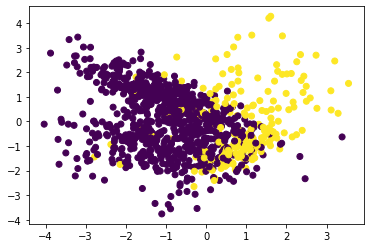

In [7]:
import matplotlib.pyplot as plt
plt.scatter(data["f1"],data["f2"],c = data["target"])

# APPLYING SMOTE

In [41]:
pip install imblearn

  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [8]:
from  imblearn.over_sampling import  SMOTE

In [9]:
oversample = SMOTE()
x,y = oversample.fit_resample(data[["f1","f2"]],data['target'])

In [10]:
x.shape


(1586, 2)

In [11]:
y.shape

(1586,)

In [12]:
df1= pd.DataFrame(x,columns=["f1","f2"])
df2 = pd.DataFrame(y,columns=["target"])

data= pd.concat([df1,df2],axis=1)

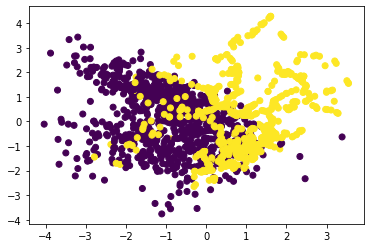

In [13]:
plt.scatter(data["f1"],data["f2"],c = data["target"])

# INTERPOLATION TECHNIQUE

## 1-LINEAR INTERPOLATION

In [15]:
import numpy as np
x = np.array([1,2,3,4,5])
y = np.array([2,4,6,8,10])

In [16]:
import matplotlib.pyplot as plt

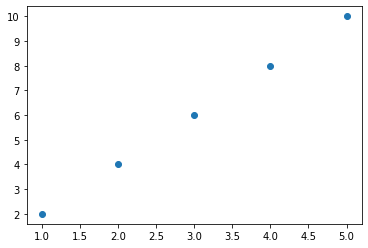

In [17]:
plt.scatter(x,y)

In [19]:
# interpolation 
new_x =  np.linspace(1,5,10)
y_interp = np.interp(new_x,x,y)

In [21]:
y_interp

[ 2.          2.88888889  3.77777778  4.66666667  5.55555556  6.44444444
  7.33333333  8.22222222  9.11111111 10.        ]


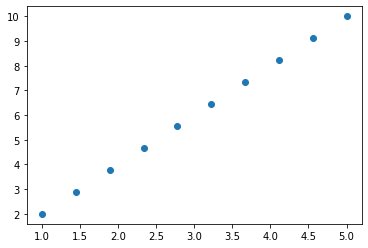

In [22]:
plt.scatter(new_x,y_interp)

In [23]:
x = np.array([1,2,3,4,5])
y = np.array([1,8,27,64,125])


In [24]:
from scipy.interpolate import interp1d

In [25]:
A = interp1d(x,y,kind = "cubic")

In [31]:
x_new = np.linspace(1,5,10)
y_interp = A(x_new)


In [32]:
y_interp

array([  1.        ,   3.01371742,   6.739369  ,  12.7037037 ,
        21.43347051,  33.45541838,  49.2962963 ,  69.48285322,
        94.54183813, 125.        ])

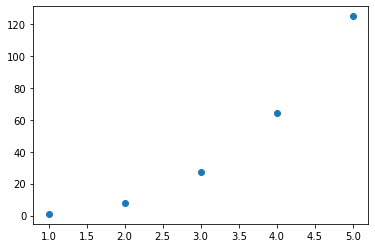

In [34]:
plt.scatter(x,y)

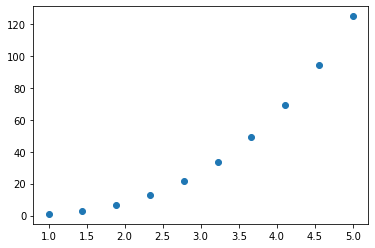

In [33]:
plt.scatter(x_new,y_interp)

#  POLYNOMIAL INTERPOLATION

In [35]:
x = np.array([1,2,3,4,5])
y = np.array([1,8,27,64,125])

In [52]:
p = np.polyfit(x,y,2)

In [49]:
x_new = np.linspace(1,5,10)
y_interp = np.polyval(p,x_new)

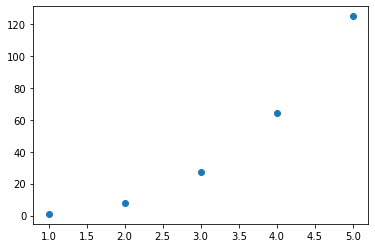

In [50]:
plt.scatter(x,y)

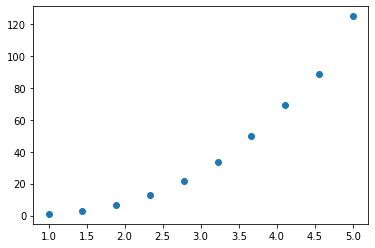

In [53]:
plt.scatter(x_new,y_interp)

# HANDLING OUTLIEARS

  5-NUMBER SUMMARY
1. MINIMUM
2. Q1-25 PERCENTILE
3. MEDIAN
4. Q3- 27 PERCENTILE
5. MAXIMUM

In [53]:
import numpy as np
marks = [-10,-19,-80,15,25,27,44,55,30,35,22,36,33,45,46,49,26,24,51,59,58,40,60,80,90,1000,500]

In [11]:
np.percentile(marks,[25])

In [12]:
np.percentile(marks,[75])

In [9]:
np.percentile(marks,[50])

array([42.])

In [10]:
np.percentile(marks,[100])

array([90.])

In [54]:
MINI,Q1,MID,Q3,MAX = np.quantile(marks,[0,0.25,0.50,0.75,1.0])


In [55]:
#IQR INTER QUARILE RANGE
IQR = Q3-Q1

In [56]:
print(IQR)

31.0


In [57]:
LOWER_FENCE = Q1-1.5*(IQR)
HIGHER_FENCE = Q3+1.5*(IQR)

In [58]:
LOWER_FENCE,HIGHER_FENCE

(-21.0, 103.0)

In [59]:
OUTLIEAR=[]

for i in marks:
    if i >= LOWER_FENCE and i <=HIGER_FENCE:
        print("This is not an outliear")
    else:
        OUTLIEAR.append(i)
    

This is not an outliear
This is not an outliear
This is not an outliear
This is not an outliear
This is not an outliear
This is not an outliear
This is not an outliear
This is not an outliear
This is not an outliear
This is not an outliear
This is not an outliear
This is not an outliear
This is not an outliear
This is not an outliear
This is not an outliear
This is not an outliear
This is not an outliear
This is not an outliear
This is not an outliear
This is not an outliear
This is not an outliear
This is not an outliear
This is not an outliear
This is not an outliear


In [60]:
OUTLIEAR

[-80, 1000, 500]

In [61]:
import seaborn as sns

C:\Users\himan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

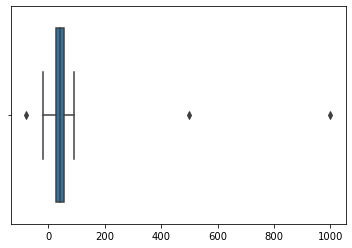

In [63]:
sns.boxplot(marks)

In [64]:
marks = [15,25,27,44,55,30,35,22,36,33,45,46,49,26,24,51,59,58,40,60,80,90]

C:\Users\himan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

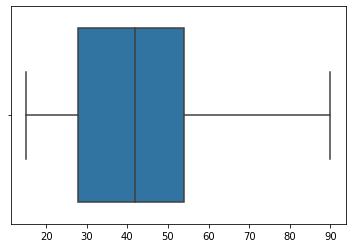

In [65]:
sns.boxplot(marks)